In [2]:
import os
import cv2
from keras_facenet import FaceNet

2024-10-19 11:46:48.316170: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-19 11:46:49.895675: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-19 11:46:50.792433: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-19 11:46:51.588728: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-19 11:46:51.844832: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-19 11:46:53.573454: I tensorflow/core/platform/cpu_feature_gu

In [4]:
faces = []
labels = []

directory = 'Celebrity Faces Dataset'
for celeb in os.listdir(directory):
    celeb_path = os.path.join(directory,celeb)
    for img in os.listdir(celeb_path):
        img_path = os.path.join(celeb_path,img)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(160,160))
        faces.append(img)
        labels.append(celeb)

In [6]:
len(faces),len(labels)

(2064, 2064)

In [8]:
import numpy as np
def get_embeddings(face , embedder):
    face = face.astype('float32')
    face = np.expand_dims(face,axis=0)
    return embedder.embeddings(face)

In [10]:
embedder = FaceNet()
embeddings_list = []
for face in faces:
    embeddings_list.append(get_embeddings(face,embedder))

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1

In [12]:
np.array(embeddings_list).shape

(2064, 1, 512)

In [14]:
embeddings_list = np.array(embeddings_list).reshape(2064,512)

In [16]:
import pandas as pd
df = pd.DataFrame(embeddings_list)

In [18]:
df.sample(2064)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.030974,-0.057220,-0.103435,0.024322,-0.047435,0.018333,0.002044,-0.017592,0.012695,-0.047804,...,-0.042524,0.074950,-0.031800,0.038197,0.053270,-0.041989,-0.032343,0.005655,0.015507,-0.003547
1,0.016193,-0.039890,-0.078932,-0.020525,0.000751,-0.058436,0.006717,-0.018308,0.003044,-0.016873,...,0.011465,-0.062820,0.024769,0.009767,-0.019320,-0.008822,-0.008196,-0.091357,0.084354,0.042691
2,0.005355,-0.016626,0.005680,-0.044723,-0.029763,-0.038042,-0.004165,-0.047086,-0.016101,-0.029837,...,-0.041106,-0.015092,-0.033385,0.005081,-0.006163,-0.105669,-0.059353,-0.023370,0.033274,0.051597
3,0.018074,-0.021660,-0.025543,-0.060775,-0.051904,-0.047001,0.000660,0.034582,-0.024973,-0.002498,...,-0.055384,-0.013000,-0.006884,-0.018997,-0.040369,-0.064637,-0.048321,-0.069013,0.017635,0.037076
4,0.037018,-0.043077,-0.078947,0.037471,-0.032192,-0.024060,-0.025302,0.039032,0.026662,-0.019649,...,-0.043873,0.082398,0.022099,0.031058,0.038702,-0.045712,-0.069038,0.069801,0.011122,-0.057210


In [20]:
df['label'] = labels

In [22]:
df.to_csv('celeb_embeddings_v2.csv',index=False)

In [24]:
x = df.drop(['label'],axis=1).values
y = df[['label']].values

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Create the SVM model
svm = SVC()

# Perform grid search to find best parameters
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameters found
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [32]:
model = SVC(C=10,gamma=1,kernel='rbf')

In [34]:
model.fit(x_train,y_train)

SVC(C=10, gamma=1)

In [36]:
y_pred=model.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
print(f'train : {accuracy_score(model.predict(x_train),y_train)}')
print(f'test : {accuracy_score(y_pred,y_test)}')

train : 1.0
test : 0.7990314769975787


In [82]:
import matplotlib.pyplot as plt
def get_cropped_face(img,cropper):
    result = cropper.predict(img)
    result = result[0]
    # for i, box in enumerate(result.boxes):
    box = result.boxes
    print(box)
    confidence = box.conf[0]
    print(confidence)
    # if confidence >= CONF_THRESHOLD:
    #     x1, y1, x2, y2 = box.xyxy[0]
    #     x1, y1, x2, y2 = round(x1.item()), round(y1.item()), round(x2.item()), round(y2.item())

    #     # print(f"Detected Bounding Box {i+1}: x1={x1}, y1={y1}, x2={x2}, y2={y2}")

    #     h,w = 160,160
    #     x1, y1 = max(0, x1), max(0, y1)
    #     x2, y2 = min(w, x2), min(h, y2)
    #     face = img[y1:y2, x1:x2]
    #     face = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
    #     return face
        
    # return None

    x1, y1, x2, y2 = box.xyxy[0]
    x1, y1, x2, y2 = round(x1.item()), round(y1.item()), round(x2.item()), round(y2.item())

    # print(f"Detected Bounding Box {i+1}: x1={x1}, y1={y1}, x2={x2}, y2={y2}")

    h,w = 160,160
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w, x2), min(h, y2)
    face = img[y1:y2, x1:x2]
    # face = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
    return face
    

def detect_face(img,embedder,cropper):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(160,160))
    plt.imshow(img)
    face = get_cropped_face(img,cropper)
    # plt.imshow(face)
    embeddings = get_embeddings(face,embedder)

    pred = model.predict(embeddings)
    return encoder.classes_[pred]
    

In [84]:
from ultralytics import YOLO
cropper = YOLO("neeraj_yolo.pt")


0: 640x640 1 person, 224.7ms
Speed: 18.2ms preprocess, 224.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9048])
data: tensor([[ 48.8056,  29.6493, 104.7209,  88.8899,   0.9048,   0.0000]])
id: None
is_track: False
orig_shape: (160, 160)
shape: torch.Size([1, 6])
xywh: tensor([[76.7632, 59.2696, 55.9153, 59.2406]])
xywhn: tensor([[0.4798, 0.3704, 0.3495, 0.3703]])
xyxy: tensor([[ 48.8056,  29.6493, 104.7209,  88.8899]])
xyxyn: tensor([[0.3050, 0.1853, 0.6545, 0.5556]])
tensor(0.9048)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array(['janardhan'], dtype=object)

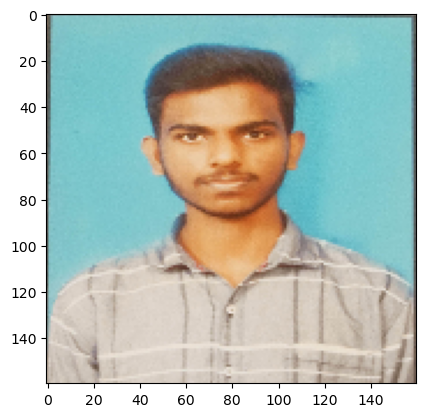

In [92]:
CONF_THRESHOLD = 0.5
img = cv2.imread('cleleb_test/janardhan_2.jpg')
plt.imshow(img)
detect_face(img,embedder,cropper)

In [94]:
import pickle 
with open('svc_model_v2.pkl','wb+') as f:
    pickle.dump(model,f)

In [96]:
embedder.model.save('embedder_celeb.h5')

In [98]:
np.save('enocoder_classes_v2.npy',encoder.classes_)